In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from keras.layers import Bidirectional

c:\Users\MuhammadAulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/dataSentimen.csv')
df

,Message,sentimen_bert,sentimen_vader
0,siap siap buat isi full tank bro,positive,neutral
1,promo tebar undi apa bisa ikut,neutral,neutral
2,oke siap noted,negative,neutral
3,buat guna baru aja sih,negative,neutral
4,ayo ayo,positive,neutral
...,...,...,...
6414,wow promo spesial akhir tahun,positive,positive
6415,kalo gue pake bakal keren gak,negative,neutral
6416,min abis tukar ambil hadiah,neutral,neutral
6417,loh iya besok tahun baru,negative,neutral


In [3]:
# Reset nomor baris data
df = df.reset_index(drop=True)

In [10]:
# # Load sentiment classifier
# classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# # Fungsi prediksi sentimen
# def prediksi_sentimen(teks):
#     hasil = classifier(teks)
#     # hasil berupa list dict: [{'label': 'POS', 'score': 0.99}]
#     return hasil[0]['label']

# # Terapkan ke kolom cleaned_text (ini akan butuh waktu karena 11k data)
# df['sentimen'] = df['cleaned_text'].apply(prediksi_sentimen)

In [11]:
# df.to_csv("data/dataSentimen.csv", index=False)

## Visualization

In [4]:
df = pd.read_csv('data/dataSentimen.csv')
df['sentimen_bert'] = df['sentimen_bert'].replace({
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
})

df['sentimen_vader'] = df['sentimen_vader'].replace({
    'positive': 'positif',
    'negative': 'negatif',
    'neutral': 'netral'
})

df

,Message,sentimen_bert,sentimen_vader
0,siap siap buat isi full tank bro,positif,netral
1,promo tebar undi apa bisa ikut,netral,netral
2,oke siap noted,negatif,netral
3,buat guna baru aja sih,negatif,netral
4,ayo ayo,positif,netral
...,...,...,...
6414,wow promo spesial akhir tahun,positif,positif
6415,kalo gue pake bakal keren gak,negatif,netral
6416,min abis tukar ambil hadiah,netral,netral
6417,loh iya besok tahun baru,negatif,netral


In [5]:
tb_counts = df.sentimen_bert.value_counts()
tb_counts

sentimen_bert
netral     2771
positif    1937
negatif    1711
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

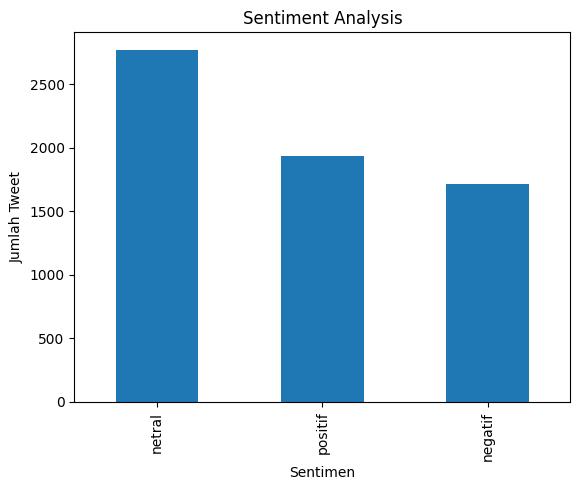

In [6]:
df['sentimen_bert'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

In [7]:
data_negatif = df[df['sentimen_bert'] == 'negatif']
data_positif = df[df['sentimen_bert'] == 'positif']
data_netral = df[df['sentimen_bert'] == 'netral']

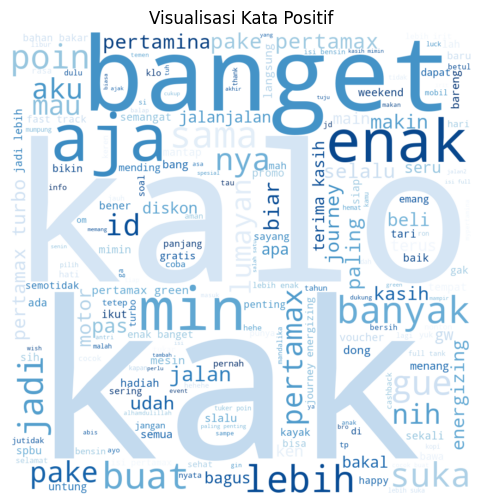

In [8]:
all_text_s1 = ' '.join(word for word in data_positif["Message"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

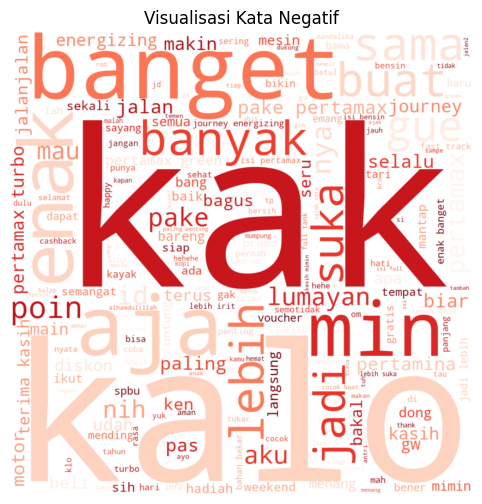

In [9]:
all_text_s2 = ' '.join(word for word in data_negatif["Message"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

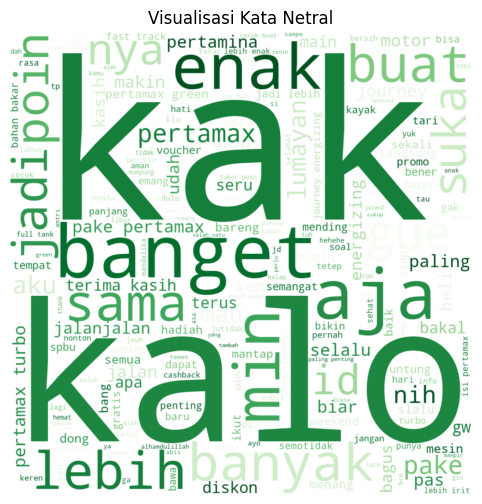

In [10]:
all_text_s3 = ' '.join(word for word in data_netral["Message"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

## BERT

In [11]:
data = df[['Message', 'sentimen_bert']]
data

,Message,sentimen_bert
0,siap siap buat isi full tank bro,positif
1,promo tebar undi apa bisa ikut,netral
2,oke siap noted,negatif
3,buat guna baru aja sih,negatif
4,ayo ayo,positif
...,...,...
6414,wow promo spesial akhir tahun,positif
6415,kalo gue pake bakal keren gak,negatif
6416,min abis tukar ambil hadiah,netral
6417,loh iya besok tahun baru,negatif


In [12]:
data['sentimen_bert'] = data['sentimen_bert'].replace({
    'positif':1,
    'negatif':2,
    'netral':0
})

C:\Users\MuhammadAulia\AppData\Local\Temp\ipykernel_11748\1366182280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentimen_bert'] = data['sentimen_bert'].replace({
C:\Users\MuhammadAulia\AppData\Local\Temp\ipykernel_11748\1366182280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen_bert'] = data['sentimen_bert'].replace({


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6419 entries, 0 to 6418
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Message        6419 non-null   object
 1   sentimen_bert  6419 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 100.4+ KB


In [14]:
# === Preprocessing ===
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Message'].values)
X = tokenizer.texts_to_sequences(data['Message'].values)
X = pad_sequences(X)

In [15]:
# === Label (sudah berupa angka 0/1/2) ===
Y = data['sentimen_bert'].values  # Sudah 0, 1, 2

In [16]:
# === Split Data ===
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (5135, 43)
Testing shape: (1284, 43)


In [17]:
# === Model Definition ===
embed_dim = 128
lstm_out = 196
num_classes = len(np.unique(Y))

model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(num_classes, activation='softmax'))  # Karena multi-class (0,1,2)

# Gunakan sparse_categorical_crossentropy karena Y berbentuk integer label (bukan one-hot)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

c:\Users\MuhammadAulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
# === Train Model ===
batch_size = 128
history = model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, verbose=1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.8620 - loss: 0.3647
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.8671 - loss: 0.3358
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.8786 - loss: 0.3166
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.8732 - loss: 0.3188
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - accuracy: 0.8743 - loss: 0.3147
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - accuracy: 0.8774 - loss: 0.3085
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.8874 - loss: 0.2903
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.8921 - loss: 0.2806
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.8985 - loss: 0.2755
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.8979 - loss: 0.2593


In [23]:
# === Ambil Akurasi ===
train_accuracy = history.history['accuracy'][-1]
print("Akurasi Training Epoch: {:.2f}%".format(train_accuracy * 100))

Akurasi Training Epoch: 89.13%


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


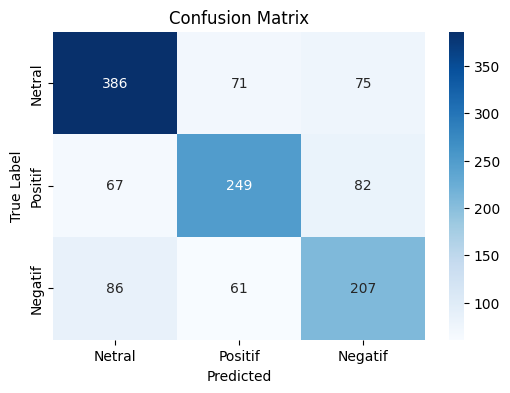

In [24]:
Y_pred = model.predict(X_test, batch_size=batch_size)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# === Confusion Matrix ===
cm = confusion_matrix(Y_test, Y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Netral', 'Positif', 'Negatif'], yticklabels=['Netral', 'Positif', 'Negatif'])
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
Y_train_pred = model.predict(X_train, batch_size=batch_size)
Y_train_pred_classes = np.argmax(Y_train_pred, axis=1)

from sklearn.metrics import classification_report, accuracy_score

print("\n📋 Classification Report:\n")
print(classification_report(Y_train, Y_train_pred_classes, target_names=['Netral', 'Positif', 'Negatif']))

# Akurasi manual juga dari prediksi ini
train_acc_manual = accuracy_score(Y_train, Y_train_pred_classes)
print("Akurasi: {:.2f}%".format(train_acc_manual * 100))

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step

📋 Classification Report:

              precision    recall  f1-score   support

      Netral       0.95      0.93      0.94      2239
     Positif       0.93      0.92      0.92      1539
     Negatif       0.88      0.92      0.90      1357

    accuracy                           0.93      5135
   macro avg       0.92      0.92      0.92      5135
weighted avg       0.93      0.93      0.93      5135

Akurasi: 92.50%
